In [9]:
import pandas as pd
import zirepy.core as zp
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from scipy.optimize import curve_fit
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return popt

%matplotlib widget

In [2]:
data110 = pd.read_csv('./run_110/data.csv')
data111 = pd.read_csv('./run_111/data.csv')
data112 = pd.read_csv('./run_112/data.csv')

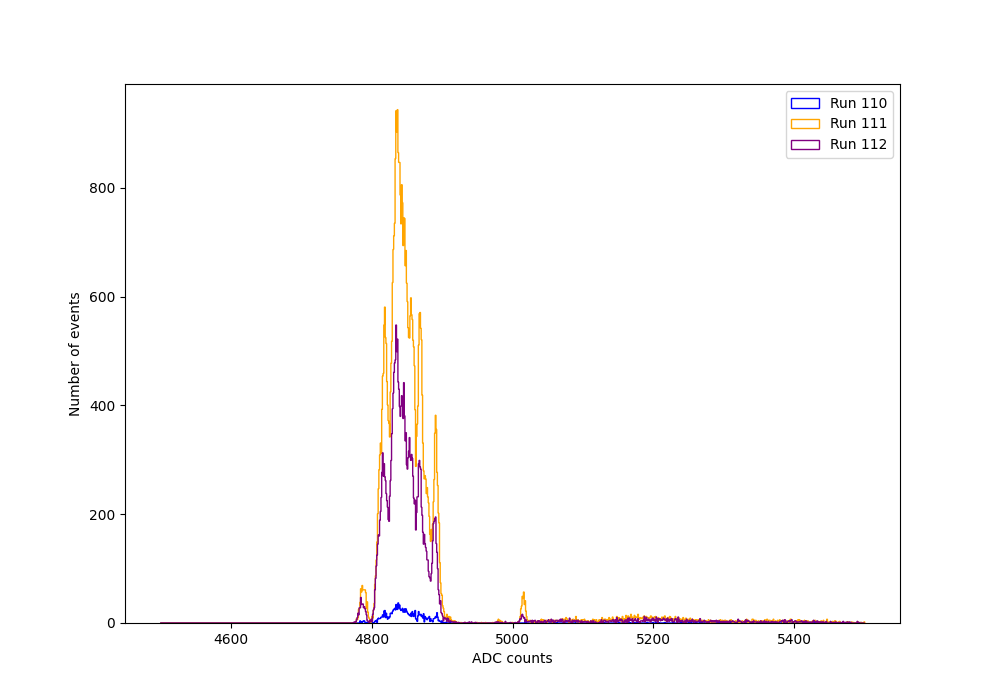

In [23]:
channel = "Asic2_CH22_HG"
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
fig.set_dpi(200)
run110 = ax.hist(data110[channel].to_numpy(), bins=np.linspace(4500, 5500, 1000), histtype='step', color='blue',   label="Run 110")
run111 = ax.hist(data111[channel].to_numpy(), bins=np.linspace(4500, 5500, 1000), histtype='step', color='orange', label="Run 111")
run112 = ax.hist(data112[channel].to_numpy(), bins=np.linspace(4500, 5500, 1000), histtype='step', color='purple', label="Run 112")
ax.set_xlabel('ADC counts')
ax.set_ylabel('Number of events')
ax.legend()

<BarContainer object of 999 artists>

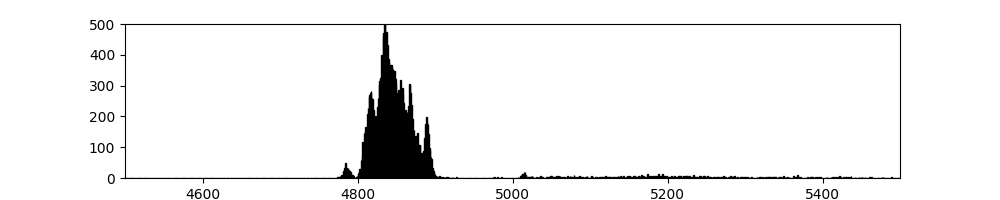

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(10,2)
fig.set_dpi(200)
ax.set_xlim(4500, 5500)
ax.set_ylim(0, 500)
ydata = (run112[0]-run110[0])       
xdata = np.linspace(4500, 5500, 999)
ax.bar(xdata, ydata, fill=False)

Text(0.5, 1.0, 'Mean is at 5014.0280561122245')

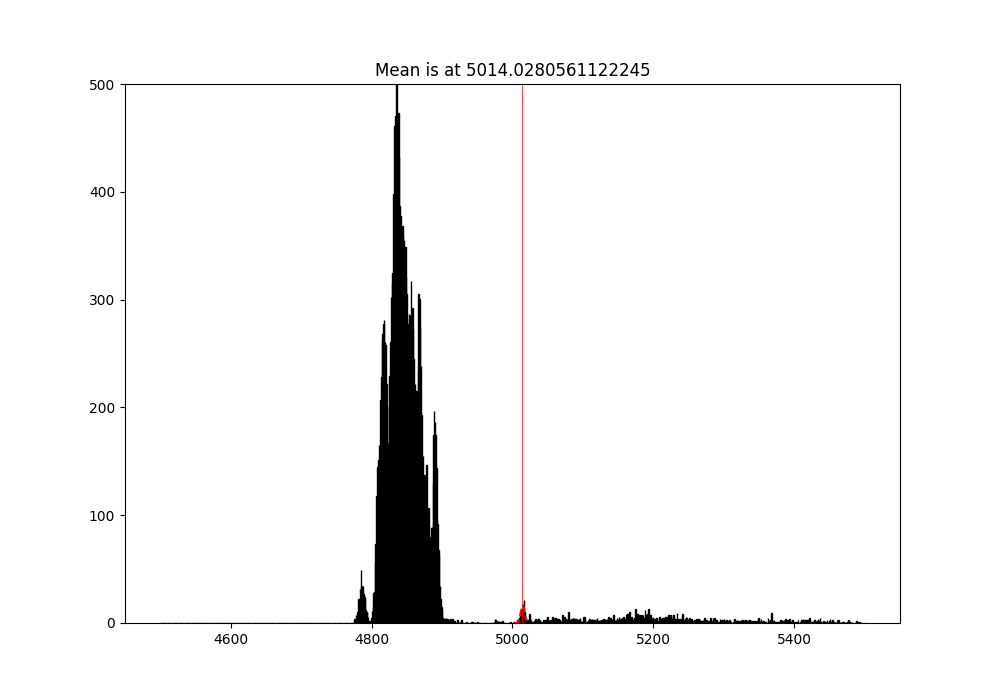

In [21]:
ydata_cut = ydata[500:520]  
xdata_cut = xdata[500:520]
H, A, x0, sigma = gauss_fit(xdata_cut, ydata_cut)

fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
fig.set_dpi(200)
ax.set_ylim(0, 500)
ax.bar(xdata, ydata, fill=False)
fit = gauss(xdata_cut, *gauss_fit(xdata_cut, ydata_cut))
idx = np.where(fit==max(fit))
ax.axvline(xdata_cut[idx[0]][0], color='red', lw=0.5)
ax.plot(xdata_cut, gauss(xdata_cut, *gauss_fit(xdata_cut, ydata_cut)), '--r', label='fit')
ax.set_title(f"Mean is at {xdata_cut[idx[0]][0]}")

In [211]:
fit = gauss(xdata_cut, *gauss_fit(xdata_cut, ydata_cut))
idx = np.where(fit==max(fit))

In [143]:
xdata_cut[idx[0]][0]

5059.197324414716

In [32]:
from scipy.optimize import curve_fit
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return popt


In [52]:
data = data92['Asic2_CH3_HG'].to_numpy()

In [24]:
zp.CALOG

{'16': 'Asic2_CH2',
 '13': 'Asic2_CH3',
 '11': 'Asic2_CH4',
 '26': 'Asic2_CH5',
 '23': 'Asic2_CH6',
 '21': 'Asic2_CH7',
 '36': 'Asic2_CH8',
 '33': 'Asic2_CH9',
 '31': 'Asic2_CH10',
 '46': 'Asic2_CH11',
 '43': 'Asic2_CH12',
 '41': 'Asic2_CH13',
 '56': 'Asic2_CH14',
 '53': 'Asic2_CH15',
 '51': 'Asic2_CH16',
 '66': 'Asic2_CH17',
 '63': 'Asic2_CH18',
 '61': 'Asic2_CH19',
 '76': 'Asic2_CH20',
 '73': 'Asic2_CH21',
 '71': 'Asic2_CH22',
 '86': 'Asic2_CH23',
 '83': 'Asic2_CH24',
 '81': 'Asic2_CH25'}

In [ ]:


channels = ['Asic2_CH20_HG', 'Asic2_CH21_HG', 'Asic2_CH22_HG']
for i in channels:
    with open(f'data112_{i}', 'w') as fp:
        for item in run112[i]:
            # write each item on a new line
            fp.write("%s\n" % item)
        print('Done')